In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from IPython.core.display import HTML
from sklearn import tree
import graphviz 
import io
import base64

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
SEED = 1
%matplotlib inline
sns.set()
sns.set_context("talk", rc={"lines.linewidth": 2})


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#What-is-Machine-Learning" data-toc-modified-id="What-is-Machine-Learning-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>What is Machine Learning</a></span><ul class="toc-item"><li><span><a href="#Basic-Terms" data-toc-modified-id="Basic-Terms-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Basic Terms</a></span></li><li><span><a href="#Assessing-Performance" data-toc-modified-id="Assessing-Performance-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Assessing Performance</a></span></li></ul></li><li><span><a href="#Simple-Regression-Model" data-toc-modified-id="Simple-Regression-Model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Simple Regression Model</a></span><ul class="toc-item"><li><span><a href="#Bias-vs-Variance" data-toc-modified-id="Bias-vs-Variance-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Bias vs Variance</a></span></li></ul></li><li><span><a href="#Simple-Classification-Model" data-toc-modified-id="Simple-Classification-Model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Simple Classification Model</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Logistic Regression</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression---Binary" data-toc-modified-id="Logistic-Regression---Binary-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Logistic Regression - Binary</a></span></li><li><span><a href="#Logistic-Regression---Multiple-Classes" data-toc-modified-id="Logistic-Regression---Multiple-Classes-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Logistic Regression - Multiple Classes</a></span></li></ul></li><li><span><a href="#Support-Vector-Machines" data-toc-modified-id="Support-Vector-Machines-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Support Vector Machines</a></span><ul class="toc-item"><li><span><a href="#Kernel-Trick" data-toc-modified-id="Kernel-Trick-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Kernel Trick</a></span></li></ul></li><li><span><a href="#Decision-Trees" data-toc-modified-id="Decision-Trees-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Decision Trees</a></span><ul class="toc-item"><li><span><a href="#Random-Forests" data-toc-modified-id="Random-Forests-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Random Forests</a></span></li></ul></li><li><span><a href="#Results" data-toc-modified-id="Results-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Results</a></span></li></ul></li><li><span><a href="#Break" data-toc-modified-id="Break-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Break</a></span></li><li><span><a href="#Natural-Language-Processing" data-toc-modified-id="Natural-Language-Processing-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Natural Language Processing</a></span><ul class="toc-item"><li><span><a href="#What-makes-NLP-hard" data-toc-modified-id="What-makes-NLP-hard-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>What makes NLP hard</a></span></li></ul></li></ul></div>

# Multidisciplinary Design Program

# Fundamentals of Machine Learning 

<br>
<br>
<br>

Jeremy Castagno

01/30/2019

<font size="14">About Me - Jeremy Castagno</font>

* 2013 - BSc. in Chemical Engineering at BYU
* Industry at Valero Energy Corporation as process control engineer
* 2016 – Robotics PhD University of Michigan

<center> <img src="assets/refinery.jpg"><center>


<br>

* Topic interests - Artificial Intelligence, Machine Learning, Path Planning, Simulation
* Research topic – Unmanned Aerial System (UAS) emergency rooftop landing in urban cities
![](assets/airsim.gif)

## What is Machine Learning

* Statistical Learning, Pattern Recognition, Big Data, Data Mining, Expert Systems, Artificial Intelligence (AI), Deep Learning
* Definition- Algorithms and Statistical Models to perform a specific task
* Broadly speaking there are three categories of ML- **supervised** learning, **unsupervised** learning, and **reinforcement** learning
* In this *short* class we will focus only on **supervised** and **unsupervised** learning
* In almost all cases there is an <font color='blue'>input</font> (x) and an <font color='green'>output</font> (y) for our system
* There is a true $f(x)$ which we seek to approximate with an $\hat{f}(x)$

**MDP Projects**

* Analyzes $\color{blue}{\text{audio inputs}}$, with a goal of determining factors such as $\color{green}{\text{occupants, locations, and state of vehicle}}$
* Process the $\ldots \color{blue}{\text{road itself}} \ldots$ to identify $\color{green}{\text{free paths or drivable surfaces}}$
* Recognize $\ldots \color{blue}{\text{email}} \ldots$ and <font color='green'>direct email to appropriate response functions [classification]</font> as well as $\color{green}{\text{suggesting a generated response}}$ 

### Basic Terms

* Regression vs Classification
  * Regression - Output takes continuous valued variables
  * Classification - Output determines group membership (class)
  * Sometimes the output is **both** - Semantic bounding boxes
* Features, predictors, response/independent variables - text email, audio stream, video stream
* Classes, labels, ground truth
* Deep learning and neural networks
  * A cascade of multiple layers processing units
  * Each layer(s) may learn different abstractions of the task

**Supervised Learning**

Learning a function that maps an *input* ($X$) to and *output* ($Y$)
<center>
$
Y=f(X)+ \underbrace{\epsilon}_{error}$
</center>


<center>
$ \mathbf{X}=\overbrace{ \left( \begin{array}{cccc}{x_{11}} & {x_{12}} & {\dots} & {x_{1 p}} \\ {x_{21}} & {x_{22}} & {\dots} & {x_{2 p}} \\ {\vdots} & {\vdots} & {\ddots} & {\vdots} \\ {x_{n 1}} & {x_{n 2}} & {\dots} & {x_{n p}}\end{array}\right)}^{Features}$
</center>

<center>
$ \mathbf{Y}=\overbrace{\left( \begin{array}{c}{y_{1}} \\ {y_{2}} \\ {\vdots} \\ {y_{n}}\end{array}\right)}^{labels} $
</center>

* Main Questions:
    * Which predictors are associated with the response?
        * Should we preprocess our raw data into features? Text $\implies$ Vector
    * What is the relationship between the response and each predictor?
    * What model can be used to estimate f?
        * Parametric Functions vs Non Parametric Functions
        * Only focus on parametric function in this class

* Share an example?
* How do we determine relationships?
  * Cross Covariance, Plotting
![](assets/covariance.png)


### Assessing Performance

* Training Set and Test Set - Split 60/40
    * Your model should never be trained with the test set
* Regression 
  * Mean Squared Error (MSE) = $ MSE=\frac{1}{n} \sum_{i=1}^{n}\left(y_{i}-\hat{f}\left(x_{i}\right)\right)^{2} $
* Classification
  * Training use Logarithmic Loss - $ \frac{-1}{N} \sum_{i=1}^{N} \sum_{j=1}^{M} y_{i j} * \log \left(p_{i j}\right) $
  * Final Assessment
      * Classification Accuracy = $\frac{\text{# of correct pred.}}{\text{Total # of pred.}}$ 
      * Confusion Matrix - True Positive, True Negative, False Positives, False Negatives


# ![](assets/Precisionrecall.png) 

# ![](assets/Precisionrecall2.png) 

<center>$ F_{1}=\left(\frac{\text { recall }^{-1}+\text { precision }^{-1}}{2}\right)^{-1}=2 \cdot \frac{\text { precision } \cdot \text { recall }}{\text { precision }+\text { recall }} $</center>

* Many others for specific tasks
  * Image Bounding Boxes - Intersection of Union (IOU)
  * TODO

* k-Fold cross validation - Train model on subsets of your training data
    * Randomly divide data set into *k* folds of equal size.
    * The first fold is treated as a validation set, the remaining *k* - 1 data is trained on
    * repeat *k* times
    * This results in *k* estimates of validation error
    * $ \mathrm{CV}_{(k)}=\frac{1}{k} \sum_{i=1}^{k} \mathrm{MSE}_{i} $
    
<center><img src="assets/animated_kfolds.gif" ></center>

https://imada.sdu.dk/~marco/Teaching/AY2010-2011/DM825/
  


## Simple Regression Model

Goals

* Understand bias/variance tradeoff
* Techniques to prevent overfitting
 


<center><font size=10>Question: How would you fit this data?</font>
<img src="assets/regression_plot.png"></img>
</center>


### Bias vs Variance

$
Y=f(X)+ \underbrace{\epsilon}_{error}
$

$\operatorname{Err}(x)=E\left[(Y-\hat{f}(x))^{2}\right] $

$ \operatorname{Err}(x) = \underbrace{\big(E[\hat{f}(x)]-f(x)\big)^{2}}_{\text{Bias}^2}+ \underbrace{E\left[(\hat{f}(x)-E[\hat{f}(x)])^{2}\right]}_{\text{Variance}}+ \underbrace{\operatorname{Var}(\epsilon)}_{\text{Irreducible Error}} $

* Bias indicates a fundamental mismatch between the actual function, $f(x)$, and the estimated function $\hat{f}(x)$
   * Linear model trying to estimate a quadratic function
* Variance refers to the amount by which $\hat{f}$ would change if we estimated it using a different training data set
  * Each $\hat{f}$ would be the same fundamental model, but have different parameters associated with it.
  * In a perfect world these different estimates of $\hat{f}$ would vary very little. 
  * If a model has high variance, small changes in the training data will make big changes in $\hat{f}$
* $\operatorname{Var}(\epsilon)$ is noise in the data and can never be reduced

* More flexible the model then variance will increase and the bias will decrease

In [5]:
NUM_SAMPLES = 100; START = 0; STOP = 10
# noise = np.random.RandomState(seed=SEED)

def f(a=1, b=2, c=2, sin_m=20):
    poly = np.poly1d([c, b, a])
    def final(x):
        return poly(x) + sin_m * np.sin(x)
    return final

def evaluate_deg(x_train, y_train, x_test, y_test, deg=1):
    params = np.polyfit(x_train, y_train, deg=deg)
    poly = np.poly1d(params)
    y_train_pred = poly(x_train)
    y_test_pred = poly(x_test)
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    return [deg, mse_train, mse_test, poly]

def plot_tradeoff(X, Y_noise, f_true, results, sigma):
    fig, ax = plt.subplots(figsize=(16, 8),nrows=1, ncols=2)
    ax[0].plot(X, Y_noise, '.', label='data')
    ax[0].plot(X, f_true(X), '-', label=r'$f(x) = 2x^2 + 2x + 1 + 20sin(x)$')
    
    degrees = [result[0] for result in results]
    mse_train_line = [result[1] for result in results]
    mse_test_line = [result[2] for result in results]
    ax[1].plot(degrees, mse_train_line, c='red', label='Train')
    ax[1].plot(degrees, mse_test_line, c='gray', label='Test')
    
    ax[1].axhline(sigma**2, linestyle='--', label=r'$\sigma^2$')
    for result in results:
        ax[0].plot(X, result[3](X), label="Deg {}".format(result[0]))
    ax[0].legend()
    ax[1].legend()

    ax[0].set_xlabel("X")
    ax[0].set_ylabel("Y")
    ax[1].set_xlabel("Degree")
    ax[1].set_ylabel("MSE")
    ax[1].set_ylim(0, 2000)

    

def set_up(mu=0, sigma=20, num_samples=NUM_SAMPLES):
    # Data
    noise = np.random.RandomState(seed=sigma)
    f_true = f()
    X = np.linspace(START, STOP, num_samples)
    Y = f_true(X)

    Y_noise = Y + noise.normal(mu, sigma, num_samples)

    x_train, x_test, y_train, y_test = train_test_split(X, Y_noise, test_size=0.50, random_state=SEED)
    degrees= [1,2, 5, 10]
    results = [evaluate_deg(x_train, y_train, x_test, y_test, deg=deg) for deg in degrees]
    
    return X, Y_noise, f_true, results

def plot_interact(mu=0, sigma=20, num_samples=NUM_SAMPLES):
    X, Y_noise, f_true, results = set_up(mu, sigma, num_samples)
    plot_tradeoff(X, Y_noise, f_true, results, sigma)



In [6]:
interact(plot_interact,  mu=fixed(0), sigma=widgets.IntSlider(min=0,max=30,step=5,value=20), 
         num_samples=widgets.IntSlider(min=100,max=500,step=200,value=100));

interactive(children=(IntSlider(value=20, description='sigma', max=30, step=5), IntSlider(value=100, descripti…

## Simple Classification Model

* Iris dataset - https://archive.ics.uci.edu/ml/datasets/Iris
* Features - Sepal Length, Sepal Width, Petal Length, Petal Width
* Output - Class prediction (Setosa, Veriscolor, Virginica)
<center><img src="assets/iris-pictures.png"> </img> </center>

Image - https://www.datacamp.com/community/tutorials/machine-learning-in-r

View of the Data

In [7]:
df_iris = sns.load_dataset('iris')
iris = pd.melt(df_iris, "species", var_name="measurement")


In [8]:
df_iris = sns.load_dataset('iris')
display(HTML(df_iris.head().to_html(index=False)))

sepal_length,sepal_width,petal_length,petal_width,species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa


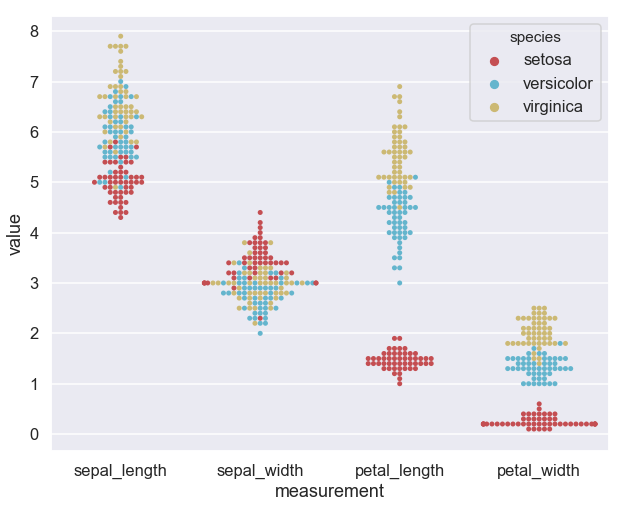

In [9]:
fig, ax = plt.subplots(figsize=(10,8), nrows=1, ncols=1)
sns.swarmplot(x="measurement", y="value", hue="species",
              palette=["r", "c", "y"], data=iris, ax=ax)

What are common techniques for separating classes?

* Linear Regression? No!

* Predict a number between 0-2

| Species    | Encoding |
|------------|----------|
| Setosa     | 0        |
| Veriscolor | 1        |
| Virginica  | 2        |

* Whats wrong with this?

* It creates an **ordering** to the classes. The regression learns that *Virginica* is "closer" to *Verisicolor* than *Setosa*.
* Often this ordering is **not** what we want

* One Hot Encoding to the rescue!
* Turn $C$ classes into an **array** of size $C$

| y       | Sertosa | Versicolor | Virginica |
|---------|---------|------------|-----------|
| Label 1 | 1       | 0          | 0         |
| Label 2 | 0       | 1          | 0         |
| Label 3 | 0       | 0          | 1         |

* Our model should learn to match this vector
* Model output is a probability distribution $\begin{pmatrix}.90 & .05 & .05 \end{pmatrix}$
* If you only have two classes (binary) use one number to represent probability of both classes.

**Techniques we will learn**
* Logistic Regression 
* Support Vector Machines
* Random Forest

**Techniques you should research later**
* XGBoost

### Logistic Regression 

#### Logistic Regression - Binary

**Binary Case** (0 or 1)

* $x$ is our feature vector: [Sepal Len, etc..]
* $w$ is a parameter vector. $w_0 x_0 + w_1 x_1 + ... + b$
* $\sigma(z)=\frac{1}{1+e^{-z}}$
![](assets/sigmoid.png)


\begin{aligned}
z=w^{T} x+b \\
p(y=1)=\sigma(z)=\sigma\left(z\right) \\
z=\log \frac{p(y=1)}{1-p(y=1)} \\
\end{aligned}

\begin{aligned} \operatorname{loss} &=-y \log (\sigma(z))-(1-y) \log (1-\sigma(z)) \\ &=\left\{\begin{array}{ll}{-\log (1-\sigma(z))} & {y=0} \\ {-\log (\sigma(z))} & {y=1}\end{array}\right. \end{aligned}

Minimize the loss by manipulating *w*. Use a solver!

#### Logistic Regression - Multiple Classes

* Assume we have $C$ classes
* One vs all
  * Separately train $C$ *binary* classifiers
  * Select the one with the highest probability
* Multinomial Logistic Regression
  * Use one hot encoding.
  * Train all classifiers together, minimizing their combined loss

### Support Vector Machines 

* SVM's separate binary classes through a linear separating hyperplane
* The plane is constructed by solving a global optimization problem 
* Maximize the margin $M$ while minimizing misclassified values
* Most data can **not** be separated *completely*, so a tuning parameter, $C$ is used to specify the *slack* 

![](assets/svm-simple-example.png)

#### Kernel Trick

* Separation is done by computing dot products between features
* Some data is not linearly separable from the provided features
* Map your feature spaces to higher dimensions, $\Phi(X)$
* $K(P(x1,y1),P(x2,y2)) = x_{1}^{2} x_{2}^{2}+y_{1}^{2} y_{2}^{2}+2 x_{1} y_{1} * x_{2} y_{2} $
* $ x_{1}^{2} x_{2}^{2}+y_{1}^{2} y_{2}^{2}+2 x_{1} y_{1} * x_{2} y_{2}  = <\left(x_{1}^{2}, y_{1}^{2}, \sqrt{2 x_{1} y_{1}}\right),\left(x_{2}^{2}, y_{2}^{2}, \sqrt{2 x_{2} y_{2}}\right)> $


<center><img src="assets/svm-vis.png"> </img> </center>

### Decision Trees

* A decision tree is drawn upside down with its root at the top. 
* Leaves represent class labels and branches represent conjunctions of features that predict class labels
* Construction - choose a feature at each step that best splits the set of items
    * Entropy
    * Gini
* Repeat this process until all training data is split

![](assets/example_decision_tree.png)

* How are splits done on continous values?
    * In order to come up with a split point, the values are sorted, and the mid-points between adjacent values are evaluated in terms of some metric, usually information gain or gini impurity. For your example, lets say we have four examples and the values of the age variable are (20,29,40,50). The midpoints between the values (24.5,34.5,45) are evaluated, and whichever split gives the best information gain (or whatever metric you're using) on the training data is used. - https://datascience.stackexchange.com/questions/24339/how-is-a-splitting-point-chosen-for-continuous-variables-in-decision-trees
    

In [10]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(df_iris.iloc[:,0:4].values, df_iris.iloc[:,4].values)

dot_data = tree.export_graphviz(clf, out_file=None, class_names=clf.classes_, feature_names=df_iris.columns.values[:-1]) 
graph = graphviz.Source(dot_data) 

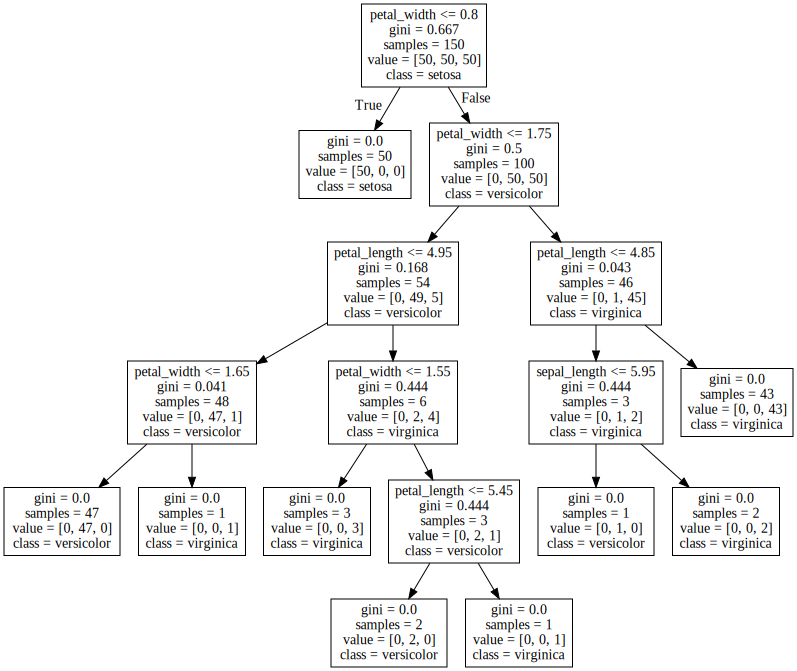

In [11]:
graph

#### Random Forests

* Ensemble Learning - A collection of multiple independently trained learning algorithms
* Bagging - Random sampling of training data
* Random feature selection (if there are alot of features)

![](assets/rf-vis.png)

### Results


## Break

* Restroom
* Discuss Projects

![](assets/Oscillating_pendulum.gif)

## Natural Language Processing

### What makes NLP hard

* Raw data is not in a vector space! Characters are not numbers and don't directly relate to eachother.
  * A lot of great work in transforming text into vector spaces using Deep learning.
* Computer can count patterns and such, but don't innately understand concepts that words and phrases provide.
  * There is a conceptual dimension that must be learned.
  * It's difficult to construct and train a model that does this with language.
* Incredible amount of ambiguity in text, even for a human.